In [5]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

from IPython.display import clear_output, display
import evolutionaryAlgorithm
import functions
import population
import specimen

# Testy inicializacji macierzy

In [63]:
def test_time_of_generate_specimen(max_generated_value, list_of_size):
    times = []
    for s in list_of_size:
        problem_matrix = np.random.randint(low=0, high=max_generated_value, size=(s, s))
        np.fill_diagonal(problem_matrix, 0)
        
        start = time.time()
        S = specimen.Specimen(problem_matrix)
        S.initialize_matrix_change()
        times.append(time.time() - start)
        
        clear_output(wait=True)
        print("max value:",max_generated_value, " size of problem: {0}".format(s))
    return times

def plot_time_generate_specimen(max_generated_values):
    list_of_size = [x for x in list(dict.fromkeys(np.logspace(0, 3, 200).astype('uint32')))[2:] if x < 150]
    fig = plt.figure()
    fig.set_figwidth(10); fig.set_figheight(6)
    for max_value in max_generated_values:
        times = test_time_of_generate_specimen(max_value, list_of_size)

        pl.plot(list_of_size, times, label="max_value: {0}".format(max_value))
        clear_output(wait=True)
        display(pl.gcf())
        time.sleep(3.0)
        
    plt.legend()
    plt.xlabel("Rozmiar osobnika",fontsize=15)
    plt.ylabel("Czas [s]",fontsize=15)
    plt.title("Zależność czasu inicializacji od rozmiaru osobnika",fontsize=15)
    plt.tight_layout()
    clear_output(wait=True)
    plt.show()
    
def semilogy_time_generate_specimen(max_generated_values):
    list_of_size = [x for x in list(dict.fromkeys(np.logspace(0, 3, 200).astype('uint32')))[2:] if x < 150]
    fig = plt.figure()
    fig.set_figwidth(10); fig.set_figheight(6)
    for max_value in max_generated_values:
        times = test_time_of_generate_specimen(max_value, list_of_size)

        pl.semilogy(list_of_size, times, label="max_value: {0}".format(max_value))
        clear_output(wait=True)
        display(pl.gcf())
        time.sleep(3.0)
        
    plt.legend()
    plt.xlabel("Rozmiar osobnika",fontsize=15)
    plt.ylabel("Czas [s]",fontsize=15)
    plt.title("Zależność czasu inicializacji od rozmiaru osobnika w skali logarytmicznej",fontsize=15)
    plt.tight_layout()
    clear_output(wait=True)
    plt.show()   

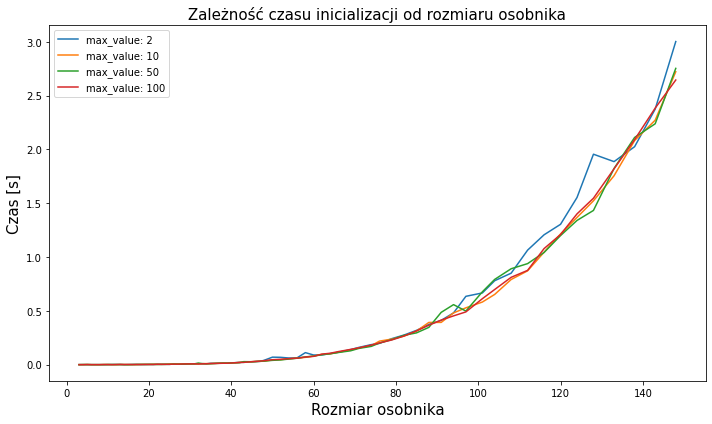

In [64]:
plot_time_generate_specimen([2, 10, 50, 100])

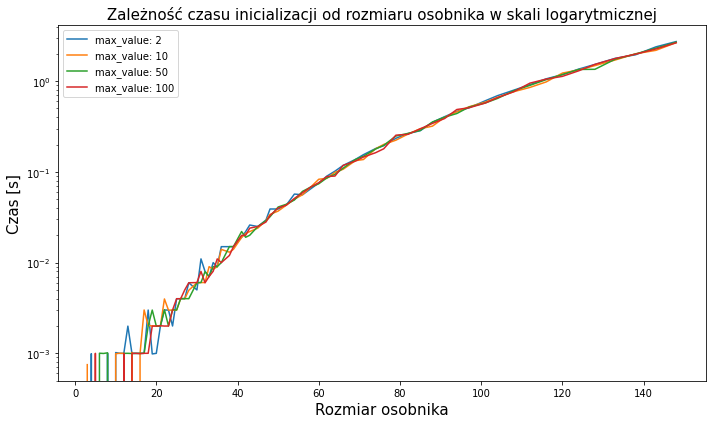

In [65]:
semilogy_time_generate_specimen([2, 10, 50, 100])

In [66]:
def test_time_of_generate_specimen_for_difrent_value(max_generated_values):
    times = []
    for mgv in max_generated_values:
        problem_matrix = np.random.randint(low=0, high=mgv, size=(20, 20))
        np.fill_diagonal(problem_matrix, 0)
        
        start = time.time()
        S = specimen.Specimen(problem_matrix)
        S.initialize_matrix_change()
        times.append(time.time() - start)
        
        clear_output(wait=True)
        print("max value: ",mgv)
    return times

def plot_time_generate_specimen2(sample):
    max_generated_values = list(dict.fromkeys(np.linspace(0, 1e9, 500).astype('uint32')))[2:]
    fig = plt.figure()
    fig.set_figwidth(10); fig.set_figheight(6)
    for s in range(sample):
        times = test_time_of_generate_specimen_for_difrent_value(max_generated_values)
        pl.plot(max_generated_values, times, '.', label="próbka: {}".format(s))
        clear_output(wait=True)
        display(pl.gcf())
        time.sleep(2.0)
        
    plt.legend()
    plt.xlabel("Największa wartość w macierzy", fontsize=15)
    plt.ylabel("Czas [s]", fontsize=15)
    plt.title("Zależność czasu od maksymalnej wartości w macierzy rozmiaru 20 x 20", fontsize=15)
    plt.tight_layout()
    clear_output(wait=True)
    plt.show()

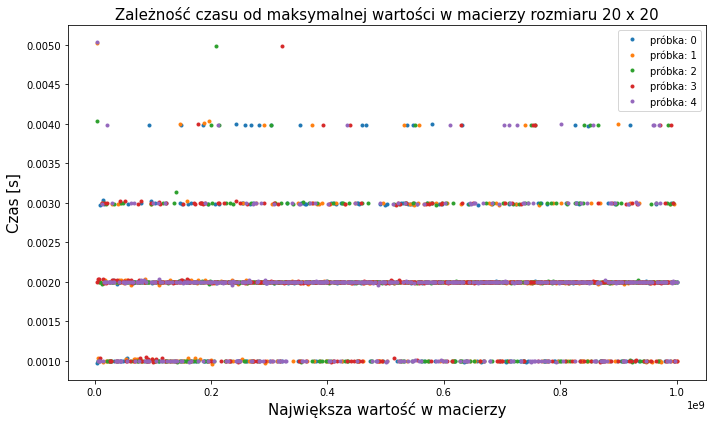

In [67]:
plot_time_generate_specimen2(sample=5)

# Test mutacji 

In [68]:
def test_time_of_mutation(max_generated_value, list_of_size):
    times = []
    for s in list_of_size:
        problem_matrix = np.random.randint(low=0, high=max_generated_value, size=(s, s))
        np.fill_diagonal(problem_matrix, 0)
        
        S = specimen.Specimen(problem_matrix)
        P = population.Population(1)
        start = time.time()
        P.elementary_mutation(S, rows_number=2, cols_number=2)
        times.append(time.time() - start)
        
        clear_output(wait=True)
        print("max value:",max_generated_value, " size of problem: {0}".format(s))
    return times

def plot_time_mutation(max_generated_values):
    list_of_size = list(dict.fromkeys(np.logspace(1, 4, 100).astype('uint32')))
    fig = plt.figure()
    fig.set_figwidth(10); fig.set_figheight(6)
    for max_value in max_generated_values:
        times = test_time_of_mutation(max_value, list_of_size)

        pl.plot(list_of_size, times, '.', label="max_value: {0}".format(max_value))
        clear_output(wait=True)
        display(pl.gcf())
        time.sleep(3.0)
        
    plt.legend()
    plt.xlabel("Rozmiar osobnika",fontsize=15)
    plt.ylabel("Czas [s]",fontsize=15)
    plt.title("Zależność czasu mutacji 2 x 2 od rozmiaru osobnika",fontsize=15)
    plt.tight_layout()
    clear_output(wait=True)
    plt.show()

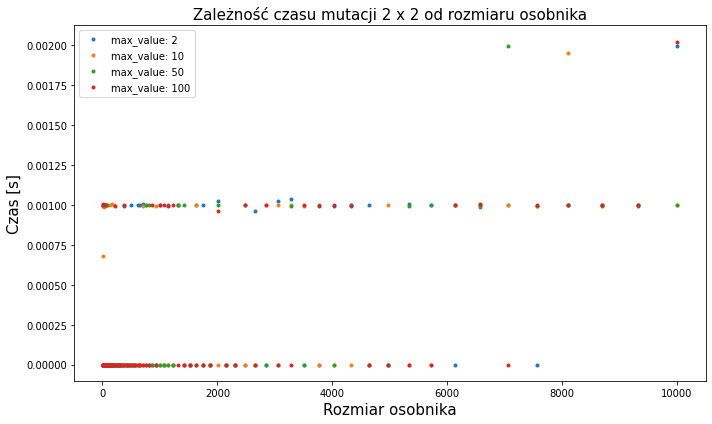

In [69]:
plot_time_mutation([2, 10, 50, 100])

In [76]:
def test_time_of_mutation_for_different_mutagene(size_of_specimen, mutation_size):
    times = []
    problem_matrix = np.random.randint(low=0, high=100, size=(size_of_specimen, size_of_specimen))
    np.fill_diagonal(problem_matrix, 0)
    
    for s in mutation_size:
        S = specimen.Specimen(problem_matrix)
        P = population.Population(1)
        start = time.time()
        P.elementary_mutation(S, rows_number=s, cols_number=s)
        times.append(time.time() - start)
        
        clear_output(wait=True)
        print("size_of_specimen:", size_of_specimen, " size of mutagen: {0} x {0}".format(s))
    return times

def plot_time_diffrent_mutagene(sizes_of_specimens):
    fig = plt.figure()
    fig.set_figwidth(10); fig.set_figheight(6)
    mutation_size = list(dict.fromkeys(np.linspace(2, sizes_of_specimens[0]/2, 50).astype('uint32')))
    for size_of_specimen in sizes_of_specimens:
        times = test_time_of_mutation_for_different_mutagene(size_of_specimen, mutation_size)

        pl.plot(mutation_size, times, label="rozmiar osobnika: {0}".format(size_of_specimen))
        clear_output(wait=True)
        display(pl.gcf())
        time.sleep(3.0)
        
    plt.legend()
    plt.xlabel("Rozmiar operatora mutacji",fontsize=15)
    plt.ylabel("Czas [s]",fontsize=15)
    plt.title("Zależność czasu od rozmiaru mutagenu dla macierzy rozmiarów {200, 400, 800}", fontsize=15)
    plt.tight_layout()
    clear_output(wait=True)
    plt.show()


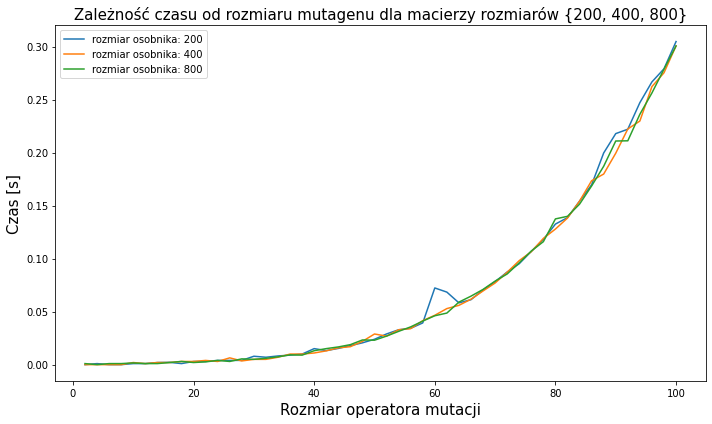

In [77]:
plot_time_diffrent_mutagene([200, 400, 800])

In [72]:
def test_quality_change_mutagen(problem_matrix):
    size_ = problem_matrix.shape[0]
    rows_numbers = np.linspace(2, int(size_/2), int(size_/2)-1).astype('uint32')
    cols_numbers = np.linspace(2, int(size_/2), int(size_/2)-1).astype('uint32')

    qualites = []
    for c in cols_numbers:
        qualities_col = []
        for r in rows_numbers:
            P = population.Population(1)
            S1 = specimen.Specimen(problem_matrix)
            start_quality = S1.quality()
            mutate_specimen = P.elementary_mutation(S1, rows_number=r, cols_number=c)

            S2 = specimen.Specimen(mutate_specimen)
            end_quality = S2.quality()
            qualities_col.append(end_quality-start_quality)

        qualites.append(qualities_col)
    fig = plt.figure(figsize=[12,10])
    X, Y = np.meshgrid(rows_numbers, cols_numbers[::-1])
    Z = np.array(qualites)

    plt.contourf(X, Y, Z)
    plt.colorbar()
    plt.title("Zależność zbieżności algorytmu od rozmiaru mutagenów - macierz rzadka", fontsize=15)
    plt.show()

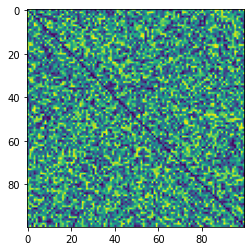

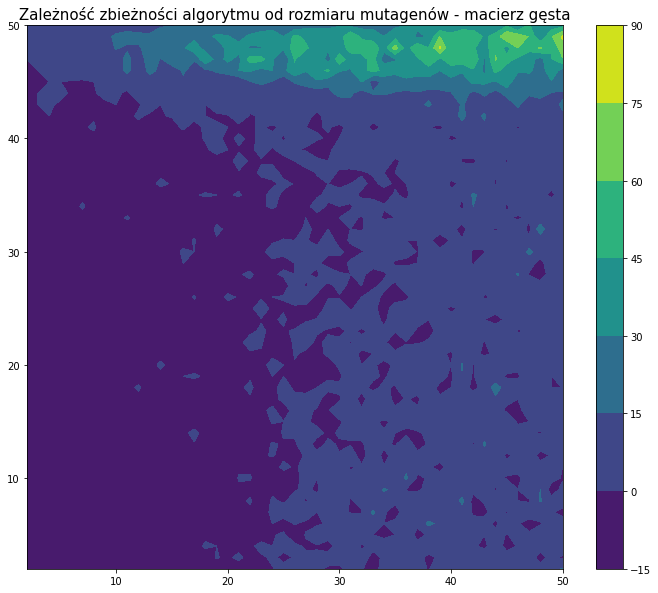

In [61]:
problem_matrix = np.random.randint(low=0, high=100, size=(100, 100))
np.fill_diagonal(problem_matrix, 0)
plt.imshow(problem_matrix)
plt.show()
test_quality_change_mutagen(problem_matrix)

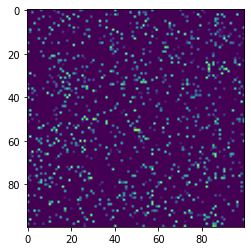

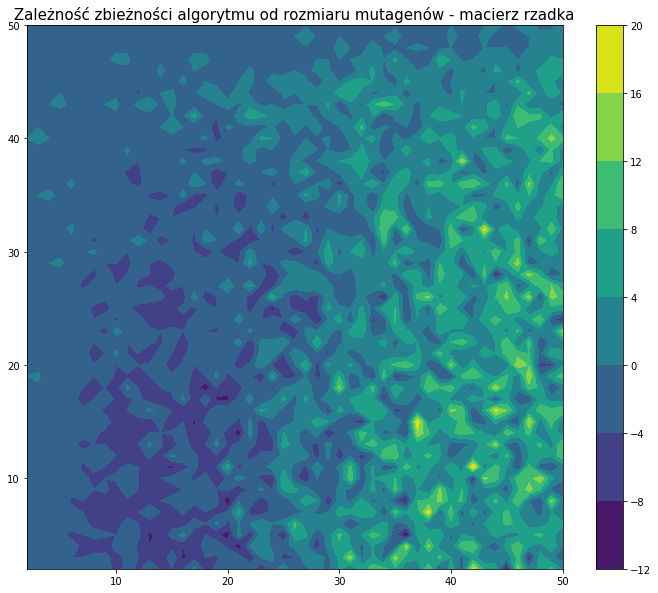

In [78]:
dense_matrix = np.random.randint(low=0, high=100, size=(100, 100))
np.fill_diagonal(dense_matrix, 0)
problem_matrix = dense_matrix - dense_matrix*(dense_matrix>10)
plt.imshow(problem_matrix)
plt.show()
test_quality_change_mutagen(problem_matrix)

In [8]:
def new_specimen(max_generated_value, size_of_matrix):
    size_ = int(size_of_matrix/2)
    LEFT_DOWN = np.random.randint(low=0, high=max_generated_value, size=(size_, size_))
    RIGHT_UP = np.random.randint(low=0, high=max_generated_value, size=(size_, size_))
    
    ZEROS = np.zeros((size_,size_))
    LEFT = np.concatenate((ZEROS, LEFT_DOWN), axis=0)
    RIGHT = np.concatenate((RIGHT_UP, ZEROS), axis=0)
    ARRAY = np.concatenate((LEFT, RIGHT), axis=1)
    ROTATE = np.rot90(ARRAY.astype('uint32'))
    np.fill_diagonal(ROTATE, 0)
    return ROTATE, np.rot90(ROTATE)
    

In [9]:
new_specimens = new_specimen(100,12)
print(new_specimens[0],"\n\n", new_specimens[1])

[[ 0 12 37 95 37 72  0  0  0  0  0  0]
 [72  0 78 24  3 22  0  0  0  0  0  0]
 [91 77  0 56 32 83  0  0  0  0  0  0]
 [32 17 46  0 13 79  0  0  0  0  0  0]
 [20 87 12 65  0  2  0  0  0  0  0  0]
 [56 62 15 46 72  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 98 70 34 73 17]
 [ 0  0  0  0  0  0 77  0 81 35  4 29]
 [ 0  0  0  0  0  0 62 33  0 79 70 52]
 [ 0  0  0  0  0  0  0 16  9  0 92 91]
 [ 0  0  0  0  0  0 75 40 88 83  0 68]
 [ 0  0  0  0  0  0  8 11 89 43 98  0]] 

 [[ 0  0  0  0  0  0 17 29 52 91 68  0]
 [ 0  0  0  0  0  0 73  4 70 92  0 98]
 [ 0  0  0  0  0  0 34 35 79  0 83 43]
 [ 0  0  0  0  0  0 70 81  0  9 88 89]
 [ 0  0  0  0  0  0 98  0 33 16 40 11]
 [ 0  0  0  0  0  0  0 77 62  0 75  8]
 [72 22 83 79  2  0  0  0  0  0  0  0]
 [37  3 32 13  0 72  0  0  0  0  0  0]
 [95 24 56  0 65 46  0  0  0  0  0  0]
 [37 78  0 46 12 15  0  0  0  0  0  0]
 [12  0 77 17 87 62  0  0  0  0  0  0]
 [ 0 72 91 32 20 56  0  0  0  0  0  0]]


In [179]:
evolutionaryAlgorithm.EvolutionaryAlgorithm(primitive_specimen=new_specimens[0],
                                            iterations=300,
                                            number_of_mutations=5,
                                            size_of_mutation=[6, 6],
                                            number_of_crossover=10).quality()

iteration 1 - quality:	 99
iteration 2 - quality:	 102
iteration 3 - quality:	 110
iteration 12 - quality:	 114
iteration 31 - quality:	 115


109

In [183]:
evolutionaryAlgorithm.EvolutionaryAlgorithm(primitive_specimen=new_specimens[1],
                                            iterations=300,
                                            number_of_mutations=5,
                                            size_of_mutation=[6, 6],
                                            number_of_crossover=10).quality()

iteration 1 - quality:	 101
iteration 2 - quality:	 105
iteration 3 - quality:	 108
iteration 8 - quality:	 112
iteration 23 - quality:	 114
iteration 111 - quality:	 115


109

In [10]:
evolutionaryAlgorithm.EvolutionaryAlgorithm(primitive_specimen=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
                                            iterations=300,
                                            number_of_mutations=5,
                                            size_of_mutation=[6, 6],
                                            number_of_crossover=10).display()

iteration 1 - quality:	 132
[[  0   0   0   0   0   0   0   0 100   0   0   0]
 [  0   0   0   0   0   0   0 100   0   0   0   0]
 [100   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 100]
 [  0   0   0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 100   0]
 [  0   0 100   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 100   0   0]
 [  0   0   0   0   0 100   0   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0   0   0]] 



In [9]:
evolutionaryAlgorithm.EvolutionaryAlgorithm(primitive_specimen=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
                                            iterations=300,
                                            number_of_mutations=5,
                                            size_of_mutation=[6, 6],
                                            number_of_crossover=10).display()

iteration 1 - quality:	 132
[[ 0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0]] 



In [10]:
evolutionaryAlgorithm.EvolutionaryAlgorithm(primitive_specimen=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
                                            iterations=300,
                                            number_of_mutations=5,
                                            size_of_mutation=[6, 6],
                                            number_of_crossover=10).display()

iteration 1 - quality:	 143
[[ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]] 

